In [3]:
import os
from pymongo.mongo_client import MongoClient
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
load_dotenv()
uri = os.environ['DB_URI']
client = MongoClient(uri)
db = client["rosen"]
collection = db["big_data"]

In [9]:
file = collection.find_one({"_id": "00f5bd09-dbc5-4434-9327-63c91ed75551"}, {"_id": 1, "measuring_points": 1})
#file = collection.find_one({"_id": "01c70e2e-144c-4719-8095-17d2fd2a5e3b"}, {"_id": 1, "measuring_points": 1})

In [10]:
df = pd.DataFrame(file.get("measuring_points"))
df.head()

,defect_channel,distance,magnetization,timestamp,velocity,wall_thickness
0,0.0,0.000000,-0.900778,1.375422e+09,0.494565,10.596800
1,0.0,0.459459,-0.926663,1.375423e+09,0.462401,11.115602
2,0.0,0.918919,-1.000078,1.375424e+09,0.411980,12.860558
3,0.0,1.378378,-0.870686,1.375425e+09,0.445213,10.806081
4,0.0,1.837838,-0.060898,1.375426e+09,0.448074,10.324141


In [11]:
df["Zeit"] = pd.to_datetime(df["timestamp"], unit="s") #convert unix timestamp to date
df = df.loc[df['magnetization'] != b'Easteregg :)'] # filter easteregg
df.head()

,defect_channel,distance,magnetization,timestamp,velocity,wall_thickness,Zeit
0,0.0,0.000000,-0.900778,1.375422e+09,0.494565,10.596800,2013-08-02 05:47:34.112327099
1,0.0,0.459459,-0.926663,1.375423e+09,0.462401,11.115602,2013-08-02 06:04:16.551870108
2,0.0,0.918919,-1.000078,1.375424e+09,0.411980,12.860558,2013-08-02 06:20:58.991413116
3,0.0,1.378378,-0.870686,1.375425e+09,0.445213,10.806081,2013-08-02 06:37:41.430956125
4,0.0,1.837838,-0.060898,1.375426e+09,0.448074,10.324141,2013-08-02 06:54:23.870499134


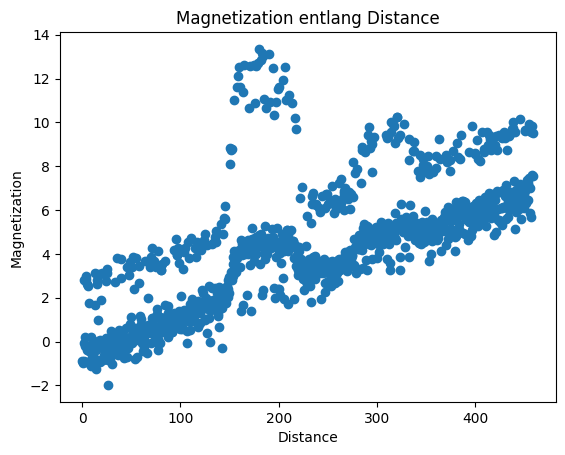

In [12]:
df.set_index("distance")
df.sort_index()
plt.plot(df['distance'], df['magnetization'], marker='o', linestyle='')
plt.xlabel('Distance')
plt.ylabel('Magnetization')
plt.title('Magnetization entlang Distance')
plt.show()